In [139]:
import pandas as pd
import numpy as np
import seaborn as sns
#from powerbiclient import QuickVisualize, get_dataset_config, Report
#from powerbiclient.authentication importDevi



In [140]:
df_data = pd.read_csv(r"C:\Users\heumo\Machine learning\Projet_Hackaton\events.csv")
df_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ
...,...,...,...,...,...,...,...,...,...
885124,2021-02-28 23:55:01 UTC,view,953226,2144415927553229037,NaN,NaN,219.94,1515915625611023730,FRLqIttxKU
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd
885127,2021-02-28 23:58:14 UTC,view,888273,2144415921932861531,electronics.telephone,NaN,10.16,1515915625611024030,9pCbKMIcSx


In [141]:
df_data.columns

Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session'],
      dtype='object')

In [142]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
product_id,885129.0,1.906621e+06,1.458708e+06,1.020000e+02,6.988030e+05,1.452883e+06,3.721194e+06,4.183880e+06
category_id,885129.0,2.144423e+18,6.165105e+14,2.144416e+18,2.144416e+18,2.144416e+18,2.144416e+18,2.227847e+18
price,885129.0,1.463287e+02,2.968077e+02,2.200000e-01,2.646000e+01,6.571000e+01,1.904900e+02,6.477106e+04
user_id,885129.0,1.515916e+18,3.554165e+07,1.515916e+18,1.515916e+18,1.515916e+18,1.515916e+18,1.515916e+18


## I Traitement des doublons

In [143]:
# Drop duplicate
df_data.drop_duplicates(inplace=True)

In [144]:

df_data.shape

(884474, 9)

## II Traitement des valuers manquantes

In [145]:
#Vérifier les valeurs nulls du data set
df_data.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236047
brand            212232
price                 0
user_id               0
user_session        162
dtype: int64

In [146]:
df_data.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

In [147]:
# Le pourcentage des valeurs manquantes
missing_percentages = (df_data.isna().sum() / len(df_data)).sort_values(ascending=False) * 100
print(f'{missing_percentages}%')

category_code    26.687839
brand            23.995279
user_session      0.018316
event_time        0.000000
event_type        0.000000
product_id        0.000000
category_id       0.000000
price             0.000000
user_id           0.000000
dtype: float64%


In [148]:
# Valeur unique de chaque colonne
#df_data.event_type.unique()
#df_data.event_type.unique()
df_data.category_code.unique()
#df_data.brand.unique()

array(['electronics.telephone', 'computers.components.cooler', nan,
       'computers.peripherals.printer', 'construction.tools.saw',
       'computers.desktop', 'computers.network.router',
       'electronics.video.tv', 'auto.accessories.player',
       'computers.components.motherboard', 'electronics.camera.video',
       'computers.peripherals.keyboard', 'computers.components.hdd',
       'electronics.audio.acoustic', 'computers.components.power_supply',
       'appliances.steam_cleaner', 'computers.components.cpu',
       'construction.tools.welding', 'appliances.kitchen.juicer',
       'computers.peripherals.scanner', 'computers.peripherals.camera',
       'electronics.tablet', 'computers.peripherals.nas',
       'stationery.cartrige', 'computers.components.network_adapter',
       'computers.peripherals.joystick', 'appliances.sewing_machine',
       'computers.peripherals.wifi', 'electronics.audio.dictaphone',
       'appliances.environment.vacuum', 'electronics.clocks',
       '

In [149]:
'''
# Fonction pour extraire les deux premiers et le dernier mot
def extraire_mots(chaine):
    mots = chaine.split(,)
    if len(mots) >= 3:
        return mots[0], mots[1], mots[-1]
    elif len(mots) == 2:
        return mots[0], mots[1], mots[1]
    elif len(mots) == 1:
        return mots[0], '', mots[0]
    else:
        return '', '', ''

'''

"\n# Fonction pour extraire les deux premiers et le dernier mot\ndef extraire_mots(chaine):\n    mots = chaine.split(,)\n    if len(mots) >= 3:\n        return mots[0], mots[1], mots[-1]\n    elif len(mots) == 2:\n        return mots[0], mots[1], mots[1]\n    elif len(mots) == 1:\n        return mots[0], '', mots[0]\n    else:\n        return '', '', ''\n\n"

In [150]:
df_data.dropna(inplace=True)
df_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
5,2020-09-24 11:57:59 UTC,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW
7,2020-09-24 11:58:24 UTC,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw
9,2020-09-24 11:58:31 UTC,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388929,F3VB9LYp39
...,...,...,...,...,...,...,...,...,...
885121,2021-02-28 23:51:25 UTC,view,622796,2144415922738167921,computers.components.cdrw,asus,147.38,1515915625572947504,SqlXaC3Wrw
885122,2021-02-28 23:53:13 UTC,view,4079420,2144415922427789416,computers.components.videocards,msi,449.51,1515915625611023581,zrl0oKrysT
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd


In [151]:
df_data.isna().sum()

event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

In [152]:
'''
# Appliquer la fonction à la colonne 'textes' et créer de nouvelles colonnes
df_data[['premier_mot', 'deuxieme_mot', 'dernier_mot']] = df_data['category_code'].apply(lambda x: pd.Series(extraire_mots(x)))

# Afficher le DataFrame résultant
print(df_data)
'''

"\n# Appliquer la fonction à la colonne 'textes' et créer de nouvelles colonnes\ndf_data[['premier_mot', 'deuxieme_mot', 'dernier_mot']] = df_data['category_code'].apply(lambda x: pd.Series(extraire_mots(x)))\n\n# Afficher le DataFrame résultant\nprint(df_data)\n"

In [153]:
# Fonction pour extraire les deux premiers et le dernier mot
def extraire_mots(chaine):
    if isinstance(chaine, str):  # Vérifie si la valeur est une chaîne de caractères
        mots = chaine.split('.')
        if len(mots) >= 3:
            return mots[0], mots[1], mots[-1]
        elif len(mots) == 2:
            return mots[0], mots[1], mots[1]
        elif len(mots) == 1:
            return mots[0], 'pas_de_categorie', mots[0]
    return 'pas_de_categorie', 'pas_de_categorie', 'pas_de_categorie'

# Convertir la colonne 'category_code' en chaînes de caractères
df_data['category_code'] = df_data['category_code'].astype(str)

# Appliquer la fonction à la colonne 'category_code' et créer de nouvelles colonnes
df_data[['category_code_1', 'category_code_2', 'category_code_3']] = df_data['category_code'].apply(lambda x: pd.Series(extraire_mots(x)))

# Suprimer la colonne category_code
#df_data.drop(columns=["category_code"],inplace = True)



In [154]:
df_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_1,category_code_2,category_code_3
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,computers,components,cooler
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,computers,peripherals,printer
5,2020-09-24 11:57:59 UTC,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW,construction,tools,saw
7,2020-09-24 11:58:24 UTC,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw,computers,network,router
9,2020-09-24 11:58:31 UTC,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388929,F3VB9LYp39,computers,network,router
...,...,...,...,...,...,...,...,...,...,...,...,...
885121,2021-02-28 23:51:25 UTC,view,622796,2144415922738167921,computers.components.cdrw,asus,147.38,1515915625572947504,SqlXaC3Wrw,computers,components,cdrw
885122,2021-02-28 23:53:13 UTC,view,4079420,2144415922427789416,computers.components.videocards,msi,449.51,1515915625611023581,zrl0oKrysT,computers,components,videocards
885125,2021-02-28 23:58:05 UTC,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma,electronics,video,tv
885126,2021-02-28 23:58:09 UTC,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd,electronics,clocks,clocks


In [173]:
df_data.shape

(515855, 15)

In [172]:
df_data[df_data["category_code"] == "nan"]

,event_time,month,day,years,time,event_type,product_id,category_id,brand,price,user_id,user_session,category_code_1,category_code_2,category_code_3


In [155]:
print(f'afficher les valeurs uniques de la category_code_1{df_data.category_code_1.unique()}')
print("#"*100)
print(f'afficher les valeurs uniques de la category_code_2{df_data.category_code_2.unique()}')
print ("#"*100)
print(f'afficher les valeurs uniques de la category_code_3{df_data.category_code_3.unique()}')
print ("#"*100)

afficher les valeurs uniques de la category_code_1['computers' 'construction' 'electronics' 'auto' 'appliances' 'stationery'
 'kids' 'accessories' 'country_yard' 'apparel' 'medicine' 'furniture'
 'sport' 'jewelry']
####################################################################################################
afficher les valeurs uniques de la category_code_2['components' 'peripherals' 'tools' 'network' 'video' 'accessories'
 'camera' 'audio' 'steam_cleaner' 'telephone' 'cartrige' 'environment'
 'clocks' 'kitchen' 'sewing_machine' 'skates' 'desktop' 'notebook' 'bag'
 'paper' 'ebooks' 'tablet' 'cultivator' 'iron' 'glove' 'weather_station'
 'battery' 'personal' 'toys' 'calculator' 'stapler' 'bathroom' 'bicycle'
 'gaming' 'lawn_mower' 'fax' 'living_room' 'souvenir' 'watering' 'bedroom']
####################################################################################################
afficher les valeurs uniques de la category_code_3['cooler' 'printer' 'saw' 'router' 'tv' 'player' 

In [156]:
# converion de la colonne event_time en datetime
df_data['event_time'] = pd.to_datetime(df_data['event_time'])
df_data.dtypes

event_time         datetime64[ns, UTC]
event_type                      object
product_id                       int64
category_id                      int64
category_code                   object
brand                           object
price                          float64
user_id                          int64
user_session                    object
category_code_1                 object
category_code_2                 object
category_code_3                 object
dtype: object

In [157]:
df_data["month"] = pd.to_datetime(df_data["event_time"]).dt.strftime("%b")
df_data["day"] = pd.to_datetime(df_data["event_time"]).dt.strftime("%a")
df_data["years"] = pd.to_datetime(df_data["event_time"]).dt.strftime("%Y")
df_data["time"] = df_data["event_time"].dt.strftime("%H:%M:%S")
df_data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,category_code_1,category_code_2,category_code_3,month,day,years,time
1,2020-09-24 11:57:26+00:00,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,computers,components,cooler,Sep,Thu,2020,11:57:26
3,2020-09-24 11:57:33+00:00,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,computers,peripherals,printer,Sep,Thu,2020,11:57:33
5,2020-09-24 11:57:59+00:00,view,664325,2144415951611757447,construction.tools.saw,carver,52.33,1515915625519388062,vnkdP81DDW,construction,tools,saw,Sep,Thu,2020,11:57:59
7,2020-09-24 11:58:24+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388882,kVBeYDPcBw,computers,network,router,Sep,Thu,2020,11:58:24
9,2020-09-24 11:58:31+00:00,view,716611,2144415923694469257,computers.network.router,d-link,53.14,1515915625519388929,F3VB9LYp39,computers,network,router,Sep,Thu,2020,11:58:31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885121,2021-02-28 23:51:25+00:00,view,622796,2144415922738167921,computers.components.cdrw,asus,147.38,1515915625572947504,SqlXaC3Wrw,computers,components,cdrw,Feb,Sun,2021,23:51:25
885122,2021-02-28 23:53:13+00:00,view,4079420,2144415922427789416,computers.components.videocards,msi,449.51,1515915625611023581,zrl0oKrysT,computers,components,videocards,Feb,Sun,2021,23:53:13
885125,2021-02-28 23:58:05+00:00,view,1715907,2144415927049912542,electronics.video.tv,starwind,80.03,1515915625611024014,g6WqPf50Ma,electronics,video,tv,Feb,Sun,2021,23:58:05
885126,2021-02-28 23:58:09+00:00,view,4170534,2144415939364389423,electronics.clocks,amazfit,64.92,1515915625611024020,xNIJBqZdkd,electronics,clocks,clocks,Feb,Sun,2021,23:58:09


In [158]:
df_data.dropna(inplace=True)

In [159]:
df_data.isna().sum()

event_time         0
event_type         0
product_id         0
category_id        0
category_code      0
brand              0
price              0
user_id            0
user_session       0
category_code_1    0
category_code_2    0
category_code_3    0
month              0
day                0
years              0
time               0
dtype: int64

In [160]:
col= ['event_time', 'month', 'day', 'years', 'time', 'event_type', 'product_id', 'category_id', 'brand',
       'price', 'user_id', 'user_session', 'category_code_1', 'category_code_2',
       'category_code_3']

In [161]:
df_data = df_data[col]
df_data.head(5)

,event_time,month,day,years,time,event_type,product_id,category_id,brand,price,user_id,user_session,category_code_1,category_code_2,category_code_3
1,2020-09-24 11:57:26+00:00,Sep,Thu,2020,11:57:26,view,139905,2144415926932472027,zalman,17.16,1515915625519380411,tdicluNnRY,computers,components,cooler
3,2020-09-24 11:57:33+00:00,Sep,Thu,2020,11:57:33,view,635807,2144415923107266682,pantum,113.81,1515915625519014356,aGFYrNgC08,computers,peripherals,printer
5,2020-09-24 11:57:59+00:00,Sep,Thu,2020,11:57:59,view,664325,2144415951611757447,carver,52.33,1515915625519388062,vnkdP81DDW,construction,tools,saw
7,2020-09-24 11:58:24+00:00,Sep,Thu,2020,11:58:24,view,716611,2144415923694469257,d-link,53.14,1515915625519388882,kVBeYDPcBw,computers,network,router
9,2020-09-24 11:58:31+00:00,Sep,Thu,2020,11:58:31,view,716611,2144415923694469257,d-link,53.14,1515915625519388929,F3VB9LYp39,computers,network,router


In [162]:
#type de donnée
df_data.dtypes

event_time         datetime64[ns, UTC]
month                           object
day                             object
years                           object
time                            object
event_type                      object
product_id                       int64
category_id                      int64
brand                           object
price                          float64
user_id                          int64
user_session                    object
category_code_1                 object
category_code_2                 object
category_code_3                 object
dtype: object

In [163]:
#Repartition de la donnée en pourcentage
df_data['event_type'].value_counts(normalize=True)

event_type
view        0.888005
cart        0.067205
purchase    0.044790
Name: proportion, dtype: float64

In [164]:
df_data.to_csv("C:/Users/heumo/Machine learning/Projet_Hackaton/event_preprosessing_1.csv", index = False)

In [165]:
filtered_df = df_data[df_data["event_type"] == "purchase"]
filtered_df

,event_time,month,day,years,time,event_type,product_id,category_id,brand,price,user_id,user_session,category_code_1,category_code_2,category_code_3
45,2020-09-24 12:04:10+00:00,Sep,Thu,2020,12:04:10,purchase,1507291,2144415926806642904,supermicro,217.57,1515915625519390468,xn6SHCnZtk,computers,components,power_supply
82,2020-09-24 12:15:06+00:00,Sep,Thu,2020,12:15:06,purchase,822426,2144415922360680550,logitech,123.35,1515915625513574486,2gngxS29Ts,computers,peripherals,camera
150,2020-09-24 12:29:49+00:00,Sep,Thu,2020,12:29:49,purchase,1283197,2144415973413749245,zyxel,123.79,1515915625519356010,3jFpdbozOd,computers,peripherals,nas
199,2020-09-24 12:43:21+00:00,Sep,Thu,2020,12:43:21,purchase,822426,2144415922360680550,logitech,123.35,1515915625513574486,2gngxS29Ts,computers,peripherals,camera
215,2020-09-24 12:48:11+00:00,Sep,Thu,2020,12:48:11,purchase,822426,2144415922360680550,logitech,123.35,1515915625513574581,qkZG0pW1kp,computers,peripherals,camera
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885070,2021-02-28 23:16:45+00:00,Feb,Sun,2021,23:16:45,purchase,4154620,2144415922427789416,msi,656.63,1515915625596749373,h4fcX0qpOc,computers,components,videocards
885078,2021-02-28 23:20:48+00:00,Feb,Sun,2021,23:20:48,purchase,500058,2144415923107266682,pantum,67.00,1515915625610973155,CxMKMQDRAN,computers,peripherals,printer
885082,2021-02-28 23:23:11+00:00,Feb,Sun,2021,23:23:11,purchase,500058,2144415923107266682,pantum,67.00,1515915625610973155,CxMKMQDRAN,computers,peripherals,printer
885090,2021-02-28 23:26:07+00:00,Feb,Sun,2021,23:26:07,purchase,500058,2144415923107266682,pantum,67.00,1515915625610973155,CxMKMQDRAN,computers,peripherals,printer


In [166]:
df_data_view = df_data.groupby(["years", "month"]).sum(numeric_only=True)
df_data_view

product_id          category_id        price  \
years month                                                   
2020  Dec    191371988863 -2290913897188433168  16123693.54   
      Nov    208576381356  3958661024178361639  16974033.25   
      Oct    171757179011 -7125358724488118303  13236102.75   
      Sep     30159418959 -5013843424492521537   2462339.75   
2021  Feb    238473629132  7027230251770015647  22616899.65   
      Jan    277090321294 -2947180639641416779  26041204.93   

                         user_id  
years month                       
2020  Dec   -1349198371078661728  
      Nov     844411187634496242  
      Oct    7908929835433983829  
      Sep    8709220491977604450  
2021  Feb    6258810872666216093  
      Jan   -5645179361104779450

<Axes: xlabel='years,month'>

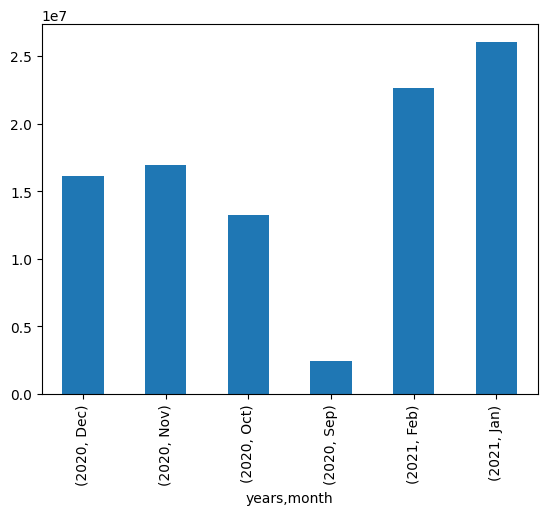

In [167]:
df_data_view["price"].plot(kind="bar")

<Axes: xlabel='years,month'>

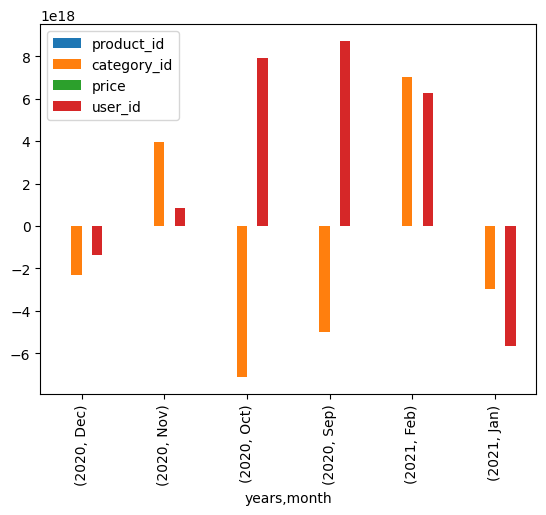

In [168]:
df_data.groupby(["years", "month"]).sum(numeric_only=True).plot(kind="bar")

In [169]:
# Répartition graphique de notre donnée
#df_data_rep = df_data['event_type'].value_counts(normalize=True).plot(kind = 'bar');


In [170]:

#PBI_visualize = QuickVisualize(get_dataset_config(df_data_rep), auth = device_auth)
#PBI_visualize

In [171]:
#df_data.to_csv('event_preprosessing.csv', index=False)
ca = df_data["price"].sum()

ca

97454273.86999996